# Length and time characteristics of active nematics

In this notebook, we present the first measurement of the characteristic length and time of the interfacial microtubule system. We use the video 10122022/00.

According to this measurement, in our system, $l_c=100$ $\mu$m, $t_c=15.5$ s.

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from myImageLib import readdata
from corrLib import corrS, vacf_piv, distance_corr, xy_bin, autocorr1d
from pivLib import read_piv
from scipy.optimize import curve_fit

In [3]:
piv_folder = r"E:\AN\10122022\PIV\00"
l = readdata(piv_folder, "csv")
corr_list = []
for num, i in l[::100].iterrows():
    x, y, u, v = read_piv(i.Dir)
    X, Y, CA, CV = corrS(x, y, u, v)
    corr_list.append(CV)

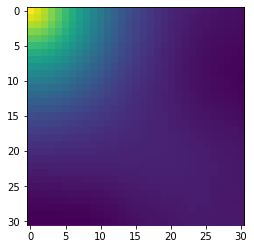

In [5]:
corr2d = np.stack(corr_list, axis=0)
corr_mean = corr2d.mean(axis=0)
plt.imshow(corr_mean)

Text(0, 0.5, '$C(r)$')

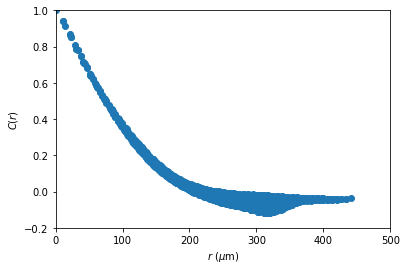

In [22]:
RC = distance_corr(X, Y, corr_mean)
plt.scatter(RC.R*0.65, RC.C)
plt.xlim([0, 500])
plt.ylim([-0.2, 1])
plt.xlabel("$r$ ($\mu$m)")
plt.ylabel("$C(r)$")

Text(0, 0.5, '$C(r)$')

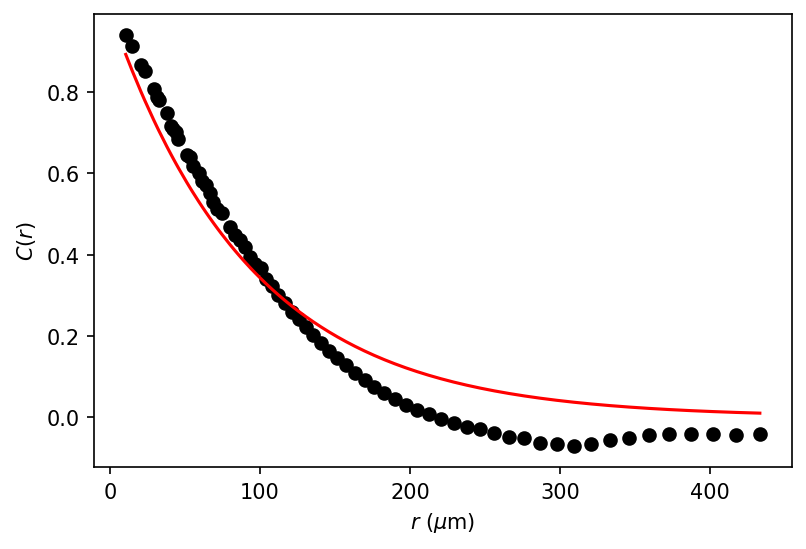

In [25]:
# bin data
x, y = xy_bin(RC.R*0.65, RC.C)
# fit an exponential decay
def exp_decay(x, tau):
    return np.exp(-x/tau)
popt, pcov = curve_fit(exp_decay, x, y)

plt.figure(dpi=150)
plt.scatter(x, y, color="black")
plt.plot(x, exp_decay(x, *popt), color="red")
plt.xlabel("$r$ ($\mu$m)")
plt.ylabel("$C(r)$")

The fit is obviously not great. However, we can easily get an approximate time scale ~100 $\mu$m. This is close to the fitting parameter $\tau=93$ s in this example. 

## Temporal evolution of spatial correlation

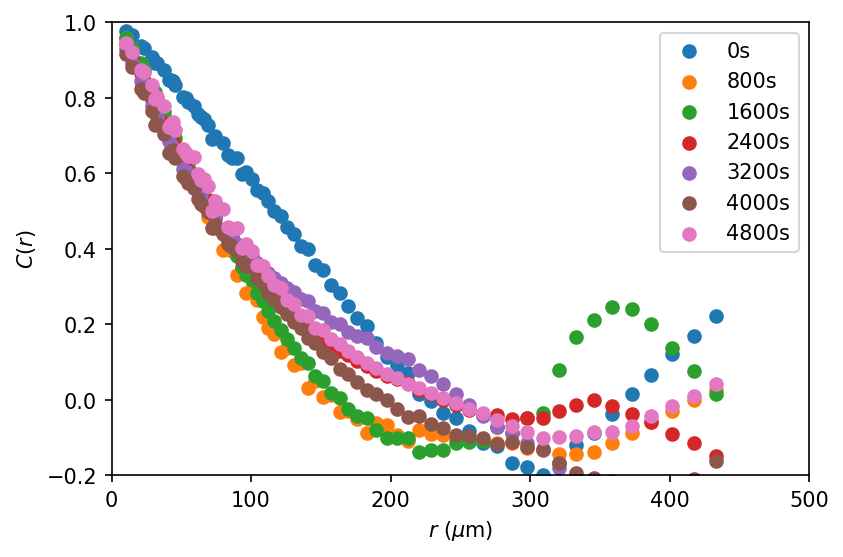

In [38]:
plt.figure(dpi=150)
count = 0
for corr in corr_list[::4]:
    RC = distance_corr(X, Y, corr)
    x, y = xy_bin(RC.R*0.65, RC.C)
    plt.scatter(x, y, label="{:d}s".format(count*800))
    count += 1
plt.xlim([0, 500])
plt.ylim([-0.2, 1])
plt.xlabel("$r$ ($\mu$m)")
plt.ylabel("$C(r)$")
plt.legend()

From 2400 s, the spatial correlation function reaches a steady state. To get a good average correlation function, one start from 2400 s. 

In [39]:
piv_folder = r"E:\AN\10122022\PIV\00"
l = readdata(piv_folder, "csv")
corr_list = []
for num, i in l[1200::50].iterrows():
    x, y, u, v = read_piv(i.Dir)
    X, Y, CA, CV = corrS(x, y, u, v)
    corr_list.append(CV)

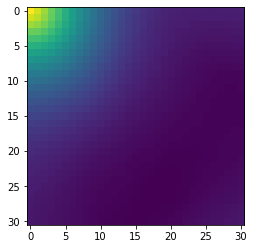

In [40]:
corr2d = np.stack(corr_list, axis=0)
corr_mean = corr2d.mean(axis=0)
plt.imshow(corr_mean)

Text(0, 0.5, '$C(r)$')

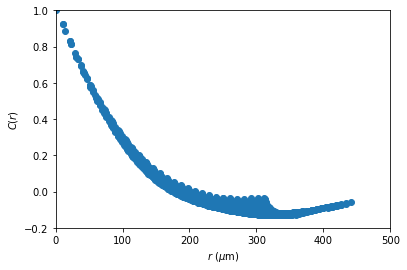

In [41]:
RC = distance_corr(X, Y, corr_mean)
plt.scatter(RC.R*0.65, RC.C)
plt.xlim([0, 500])
plt.ylim([-0.2, 1])
plt.xlabel("$r$ ($\mu$m)")
plt.ylabel("$C(r)$")

Text(0, 0.5, '$C(r)$')

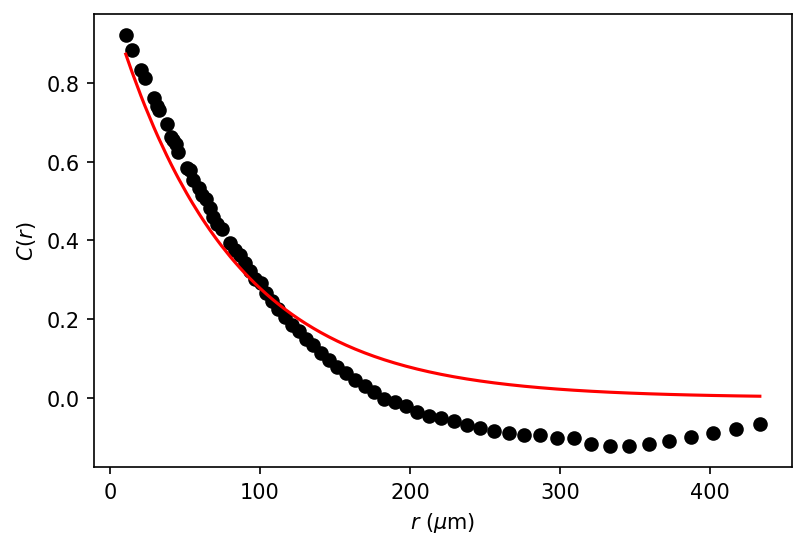

In [42]:
# bin data
x, y = xy_bin(RC.R*0.65, RC.C)
# fit an exponential decay
def exp_decay(x, tau):
    return np.exp(-x/tau)
popt, pcov = curve_fit(exp_decay, x, y)

plt.figure(dpi=150)
plt.scatter(x, y, color="black")
plt.plot(x, exp_decay(x, *popt), color="red")
plt.xlabel("$r$ ($\mu$m)")
plt.ylabel("$C(r)$")

In [43]:
popt

array([78.23714795])

Fit is still not good. Something is beyond this simple exponential decay model. Need to look into literatures.

## Temporal autocorrelation

In [46]:
piv_folder = r"E:\AN\10122022\PIV\00"
l = readdata(piv_folder, "csv")
u_list = []
v_list = []
for num, i in l.iterrows():
    x, y, u, v = read_piv(i.Dir)
    u_list.append(u)
    v_list.append(v)

TypeError: vacf_piv() got an unexpected keyword argument 'axis'

In [76]:
uacf = vacf_piv(np.stack(u_list, axis=0), dt=2)
vacf = vacf_piv(np.stack(v_list, axis=0), dt=2)

-2.4694363627945393 6.653021170618383
-2.7004386470059814 7.506214519486419
-78.22622028983182 7.155814114163144
-133.9947039997502 8.269811286835669
-94.1018154470517 10.004175665542695
-93.03352587721008 12.31637928473913
-16.658993726459528 13.251398833980463
11.773946362177696 14.36450557260023
101.98921817683421 15.679496466966373
118.42602003982933 13.826398781308333
125.95643188730901 11.828222146887123
110.54252782010485 10.458037746500304
97.8661957012369 9.799387897378697
114.95096697522845 8.6463763107107
49.33289271622104 9.79377477485594
-60.250332442675756 11.220195878416748
-77.61645082711243 9.676172622903337
-102.38288006371232 10.154380955421686
-95.60607020468154 8.550244153666076
-60.27653613714881 8.457755590493669
27.753941173604687 8.20192827798084
73.63979985203872 8.264439461222663
91.24249463072931 5.753871309062483
67.90723753614554 6.041344138933358
116.99169260212244 3.906507270203614
115.1246658660449 3.462946252328078
169.75586842282422 2.9193713856818406

Text(0, 0.5, '$C(t)$')

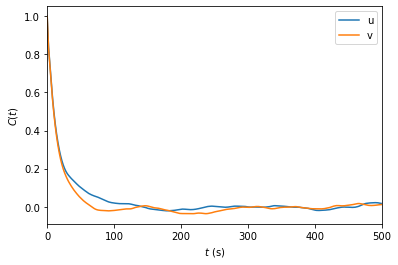

In [85]:
plt.plot(uacf.index, uacf.c, label="u")
plt.plot(vacf.index, vacf.c, label="v")
plt.xlim(0, 500)
plt.legend()
plt.xlabel("$t$ (s)")
plt.ylabel("$C(t)$")

In [88]:
ACF

,c
t,
0,1.000000
2,0.835652
4,0.744123
6,0.650854
8,0.566115
...,...
590,-0.006320
592,-0.006203
594,-0.006267


Text(0, 0.5, '$C(t)$')

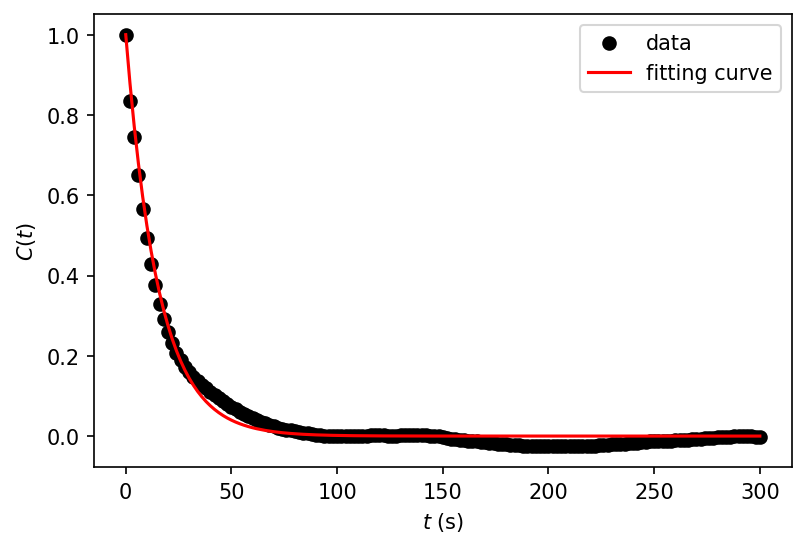

In [91]:
ACF = ((uacf + vacf) / 2).loc[:300]
plt.figure(dpi=150)
plt.scatter(ACF.index, ACF.c, color="black", label="data")
popt, pcov = curve_fit(exp_decay, ACF.index, ACF.c)
plt.plot(ACF.index, exp_decay(ACF.index, *popt), color="red", label="fitting curve")
plt.legend()
plt.xlabel("$t$ (s)")
plt.ylabel("$C(t)$")

In [92]:
popt

array([15.49185899])

The fit for VACF is better than the spatial one. We get the characteristic time $\tau=15.5$ s. 